# Análise de dados do IBGE do município de Sorocaba-SP

## Resumo

Neste notebook, iremos explorar dados do Censo de 2010 do IBGE utilizando a linguagem Python e as bibliotecas Folium e GeoPandas.

Este notebook foi adapatado do curso Introdução a Análise de dados geográficos com Python da Ocean. Com Alice Adativa.

In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import contextily      # mapas estáticos
import folium          # mapas interativos
import matplotlib.pyplot as plt
import seaborn as sns

import os
from urllib.request import urlretrieve
import zipfile

In [2]:
sns.set(font_scale=1.4)
sns.set_style({'font.family': 'serif',
               'fontname': 'Times New Roman'})

## 1) Fontes de dados

### 1.1) Setores censitários

* Fonte: [Instituto Brasileiro de Geografia e Estatística (IBGE)](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/26565-malhas-de-setores-censitarios-divisoes-intramunicipais.html?=&t=downloads)

In [3]:
if not os.path.exists('/kaggle/working/mapas'):
    os.makedirs('/kaggle/working/mapas')

In [4]:
#pegando os dados censitários de São Paulo
url_setores_censitarios = 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_de_setores_censitarios__divisoes_intramunicipais/censo_2010/setores_censitarios_shp/sp/sp_setores_censitarios.zip'

In [8]:
%%time

urlretrieve(url_setores_censitarios, '/kaggle/working/mapas/sp_setores_censitarios.zip')

In [9]:
with zipfile.ZipFile('/kaggle/working/mapas/sp_setores_censitarios.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/mapas/')

In [10]:
os.remove('/kaggle/working/mapas/sp_setores_censitarios.zip')

In [11]:
sp_setores_gdf = gpd.read_file('/kaggle/working/mapas/35SEE250GC_SIR.shp')

In [12]:
#ve o tamanho da tabela entre linhas e colunas
sp_setores_gdf.shape

In [13]:
#ver o cabeçãlho da tabela
sp_setores_gdf.head()

In [14]:
sp_setores_gdf['NM_MUNICIP'].unique()

In [15]:
#para ver um poligono em uma determinada linha.
sp_setores_gdf.iloc[10].geometry

In [16]:
# olhando a projeção
sp_setores_gdf.crs.to_string()

In [17]:
#fazendo a conversão
sp_setores_gdf = sp_setores_gdf.to_crs(crs='EPSG:3857')

In [18]:
#conferindo a conversão
sp_setores_gdf.crs.to_string()

In [19]:
#agora a coluna geometry está em metros
sp_setores_gdf.head()

In [20]:
#plotando os shapes com borda preta e sem preenchimento
ax = sp_setores_gdf.plot(figsize=(15, 10), edgecolor='black', facecolor='none')
contextily.add_basemap(ax) # esse comando coloca um mapa de background
ax.set_axis_off()
plt.show()

In [21]:
#mascara booleana
sor_setores_gdf = sp_setores_gdf[sp_setores_gdf['NM_MUNICIP'] == 'SOROCABA']

In [22]:
sor_setores_gdf.head()

In [23]:
sor_setores_gdf.shape

In [24]:
ax = sor_setores_gdf.plot(figsize=(15, 10), edgecolor='black', facecolor='none')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [25]:
#Separando o mapa em área urbana e rural
ax = sor_setores_gdf.plot(figsize=(15, 10), edgecolor='black', column='TIPO', legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [26]:
#separando somente área urbana
sor_setores_urb_gdf = sor_setores_gdf[sor_setores_gdf['TIPO'] == 'URBANO']

In [27]:
sor_setores_urb_gdf.shape

In [28]:
#mapa da área urbana somente
ax = sor_setores_urb_gdf.plot(figsize=(15, 10), edgecolor='black', facecolor='none')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [29]:
sor_setores_urb_gdf.head()

In [ ]:
# quantificar quantos setores tem em cada bairro
# Esse dataset não possui nomes dos bairros
# plt.figure(figsize=(50,8))

# ax = sns.countplot(x='NM_BAIRRO', 
#                    data=sor_setores_gdf, 
#                    order=sor_setores_gdf['NM_BAIRRO'].value_counts().index)

# labels = [item.get_text().replace(' ', '\n') for item in ax.get_xticklabels()]
# ax.set_xticklabels(labels, rotation = 90)

# ax.set_xlabel('Bairros')
# ax.set_ylabel('Qtd. de setores censitários')

# plt.show()

In [ ]:
# ax = sor_setores_urb_gdf.plot(figsize=(50, 30), edgecolor='black', column='NM_BAIRRO', legend=True)
# contextily.add_basemap(ax)
# ax.set_axis_off()
# plt.show()

In [30]:
sor_setores_urb_gdf.to_file('/kaggle/working/mapas/sor_setores_urb.json', driver='GeoJSON')

### 1.2) Censo de 2010

* Fonte: [Instituto Brasileiro de Geografia e Estatística (IBGE)](https://www.ibge.gov.br/geociencias/downloads-geociencias.html)

In [31]:
if not os.path.exists('/kaggle/working/censo2010'):
    os.makedirs('/kaggle/working/censo2010')

In [32]:
url_censo_2010_sp = 'https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_do_Universo/Agregados_por_Setores_Censitarios/SP_Exceto_a_Capital_20190207.zip'

In [33]:
%%time

urlretrieve(url_censo_2010_sp, '/kaggle/working/censo2010/SP_Exceto_a_Capital_20190207.zip')

In [34]:
with zipfile.ZipFile('/kaggle/working/censo2010/SP_Exceto_a_Capital_20190207.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/censo2010/')

In [35]:
os.remove('/kaggle/working/censo2010/SP_Exceto_a_Capital_20190207.zip')

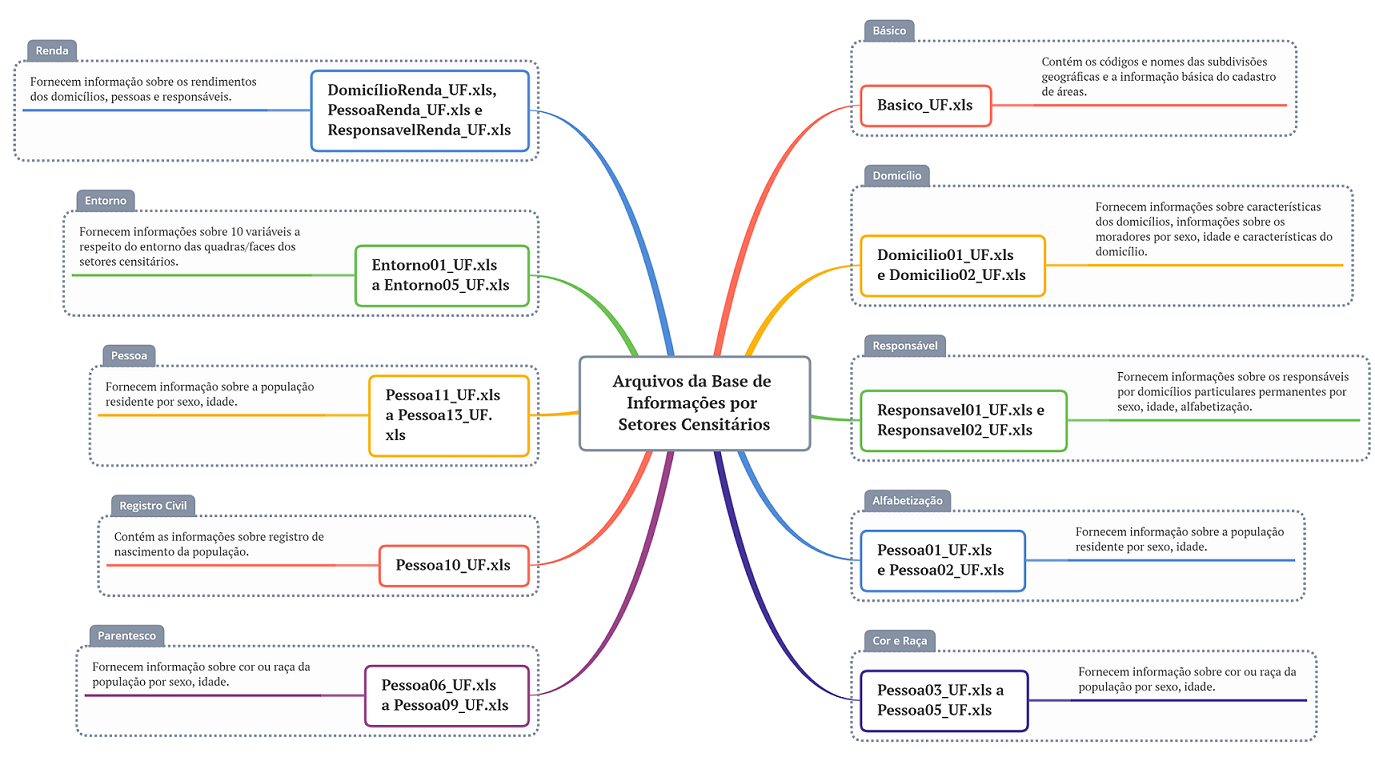

In [36]:
sor_censo_entorno01_df = pd.read_csv('/kaggle/working/censo2010/SP Exceto a Capital/Base informaçoes setores2010 universo SP_Exceto_Capital/CSV/Entorno01_SP2.csv', sep=';')

In [37]:
sor_censo_entorno01_df.shape

In [38]:
sor_censo_entorno01_df.head()

In [ ]:
sor_censo_entorno01_df.columns

## 2) O que podemos extrair de informações dos dados?

### 2.1) Limpeza e transformação de dados

In [39]:
sor_censo_entorno01_df.dtypes

O IBGE define sempre a coluna em 0 se não tem e se não tiver essa informação ele define como x. Por isso q mesmo q os valores da coluna sejam numeros ele acaba ficando como object por causa desse 'x'.

In [40]:
#separando as colunas que me interessam
colunas = [
    'V001', # Domicílios
    'V008', 'V010', 'V012', # Iluminação pública
    'V014', 'V016', 'V018', # Pavimentação
    'V020', 'V022', 'V024', # Calçada
    'V038', 'V040', 'V042', # Rampa para cadeirante
    'V044', 'V046', 'V048' # Arborização
          ]  
sor_censo_entorno01_df[colunas] = sor_censo_entorno01_df[colunas].replace('X', '0')

In [41]:
sor_censo_entorno01_df[colunas] = sor_censo_entorno01_df[colunas].astype(int, copy=False)

In [42]:
sor_censo_entorno01_df.dtypes

In [43]:
#separando as colunas que fiz a limpeza
sor_gdf = sor_censo_entorno01_df[['Cod_setor'] + colunas]
sor_gdf.head()

In [44]:
%%capture

# pegando as colunas e somando pra agregar pq não me interessa se a casa é cedida, alugada ou comprada.

sor_gdf['ILUMINACAO'] = sor_gdf.loc[:, 'V008':'V012'].sum(axis=1)
sor_gdf['PAVIMENTACAO'] = sor_gdf.loc[:, 'V014':'V018'].sum(axis=1)
sor_gdf['CALCADA'] = sor_gdf.loc[:, 'V020':'V024'].sum(axis=1)
sor_gdf['RAMPA_CADEIRANTE'] = sor_gdf.loc[:, 'V038':'V042'].sum(axis=1)
sor_gdf['ARBORIZACAO'] = sor_gdf.loc[:, 'V044':'V048'].sum(axis=1)

In [45]:
sor_gdf.head()

In [46]:
#elimando as colunas q não vou usar mais
sor_gdf = sor_gdf.drop(columns=colunas[1:]).copy()
sor_gdf.head()

In [47]:
sor_gdf.columns = ['CD_GEOCODI', 'DOMICILIOS', 'ILUMINACAO', 'PAVIMENTACAO', 'CALCADA', 'RAMPA_CADEIRANTE', 'ARBORIZACAO']
sor_gdf.head()

In [48]:
%%capture

sor_setores_urb_gdf['CD_GEOCODI'] = sor_setores_urb_gdf['CD_GEOCODI'].astype(int, copy=False)

In [49]:
sor_gdf = pd.merge(sor_setores_urb_gdf[['CD_GEOCODI', 'NM_MUNICIP', 'geometry']], sor_gdf, on='CD_GEOCODI')
sor_gdf = sor_gdf.dropna().copy()
sor_gdf.head()

In [50]:
sor_gdf.shape

In [51]:
sor_gdf.crs.to_string()

In [52]:
sor_gdf = sor_gdf.to_crs(crs='EPSG:4326')

In [53]:
sor_gdf.crs.to_string()

### 2.2) Visualizando informações de municípios

In [57]:
coord_sorocaba = [-23.501944445285, -47.457777777778,]
mapa_sor = folium.Map(location=coord_sorocaba, zoom_start=10)

In [58]:
mapa_sor

In [59]:
#criando popup
resolution, width, height = 100, 5, 5

for row in sor_gdf.values:
    setor_geo = folium.GeoJson(row[2])
    
    setor_geo_id = row[0]
    setor_geo_municipio = row[1]
    
    html = '<h2>{}</h2>'.format('Setor Censitário: ' + str(setor_geo_id))
    html += '<hr>' #pula a linha
    html += '<p>{}</p>'.format('Municipio: ' + setor_geo_municipio)
    html += '<hr>' #pula a linha
    html += sor_gdf[sor_gdf['CD_GEOCODI'] == setor_geo_id][['DOMICILIOS', 
                                                          'ILUMINACAO', 
                                                          'PAVIMENTACAO']].to_html(index=False) #convertendo pra html
    html += sor_gdf[sor_gdf['CD_GEOCODI'] == setor_geo_id][['CALCADA',
                                                          'RAMPA_CADEIRANTE',
                                                          'ARBORIZACAO']].to_html(index=False)
    
    iframe = folium.IFrame(html, width=(width*resolution)+20, height=(height*resolution)+20)
    setor_geo.add_child(folium.Popup(iframe, max_width=2650))
    
    mapa_sor.add_child(setor_geo)

In [60]:
mapa_sor

In [61]:
mapa_sor.save('mapa_sor_setores_censitarios.html')

### 2.3) Criação de mapas coropléticos com os dados do IBGE

mapas coropléticos são aqueles que usam diferentes tons de cores para codificar valores quantitativos de uma área.

In [62]:
sor_gdf

In [63]:
coord_sorocaba = [-23.501944445285, -47.457777777778]
mapa_sor = folium.Map(location=coord_sorocaba, zoom_start=12)

In [64]:
#criando um mapa cloropletico de acordo com os atributos que eu quero
folium.Choropleth(geo_data = sor_gdf,
                  name = 'Domicílios',
                  data = sor_gdf,
                  columns = ['CD_GEOCODI', 'DOMICILIOS'],
                  key_on = 'feature.properties.CD_GEOCODI',
                  fill_color = 'RdGy',
                  fill_opacity = 0.75,
                  line_opacity = 0.75,
                  legend_name = 'Domicílios').add_to(mapa_sor)

folium.Choropleth(geo_data = sor_gdf,
                  name = 'Iluminação Pública',
                  data = sor_gdf,
                  columns = ['CD_GEOCODI', 'ILUMINACAO'],
                  key_on = 'feature.properties.CD_GEOCODI',
                  fill_color = 'YlOrBr',
                  fill_opacity = 0.75,
                  line_opacity = 0.75,
                  legend_name = 'Iluminação Pública').add_to(mapa_sor)

folium.Choropleth(geo_data = sor_gdf,
                  name = 'Rampas para cadeirantes',
                  data = sor_gdf,
                  columns = ['CD_GEOCODI', 'RAMPA_CADEIRANTE'],
                  key_on = 'feature.properties.CD_GEOCODI',
                  fill_color = 'BuGn',
                  fill_opacity = 0.75,
                  line_opacity = 0.75,
                  legend_name = 'Rampas para cadeirantes').add_to(mapa_sor)

folium.Choropleth(geo_data = sor_gdf,
                  name = 'Arborização',
                  data = sor_gdf,
                  columns = ['CD_GEOCODI', 'ARBORIZACAO'],
                  key_on = 'feature.properties.CD_GEOCODI',
                  fill_color = 'YlGn',
                  fill_opacity = 0.75,
                  line_opacity = 0.75,
                  legend_name = 'Arborização').add_to(mapa_sor)

folium.LayerControl().add_to(mapa_sor)

Entendendo a Camada Choropleth


**geo_data** = é o seu arquivo json.

**name** = 'Domicílios' é o nome da sua camada.

**data** = são os seus dados, o seu dataframe.

**columns** = lista de colunas contidas no seu dataset, sendo a primeira a coluna que vai fazer a ligação com o json (no 
nosso caso era coluna 'CD_GEOCODI') e a segunda ('DOMICILIOS') é a coluna de onde o folium deve tirar os números para criar a escala de cores.

**key_on** = coluna importante onde você diz ao folium como fazer a ligação entre a coluna df.States e o json.

**fill_color** = cor do choropleth. Outras opções: ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’.

**fill_opacity, line_opacity** = opacidade da cor de preenchimento e da linha de contorno.

**legend_name** = Nome na legenda de cores.

fonte: [criando mapas interativos e choropleth maps com folium em python](http://medium.com/data-hackers/criando-mapas-interativos-e-choropleth-maps-com-folium-em-python-abffae63bbd6) 

In [66]:
mapa_sor.save('mapa_sor_entorno.html')

In [67]:
sor_gdf.head()

In [68]:
mapa_sor